# First Hypothesis Testing

CBE 20258. Numerical and Statistical Analysis. Spring 2020.

&#169; University of Notre Dame

## Learning Objectives

After studying this notebook, attending class, completing the home activities, and asking questions, you should be able to:
* Use a confidence interval to perform hypothesis testing
* Apply the 5-step hypothesis testing procedure
 * Identify null and alternative hypotheses from a problem description
 * Calculate test statistic
 * Draw "area under curve" that corresponds to P-value for a given set of hypotheses

In [1]:
# load libraries
import scipy.stats as stats
import numpy as np
import math
import matplotlib.pyplot as plt

## Hypothesis Testing

**Further Reading**: §6.1, §6.2, and §6.4 in Navidi (2015)

**Main Idea**: Using a **sample**, draw inference about a scientific hypothesis involving the **population mean**. (Engineers are sometimes interested in inference about the population variance too. We will not learn about these flavors of hypothesis testing this semester - we can only cover so much. Please note that hypothesis testing is not limited to the population mean.)

### Motivating Example: Catalyst Lifetime

**Story**  
As a process engineer, you would like to infer if a new catalyst (data shown below/also in last notebook) has a longer life than current catalyst (5.7 hours) used in our company's process.

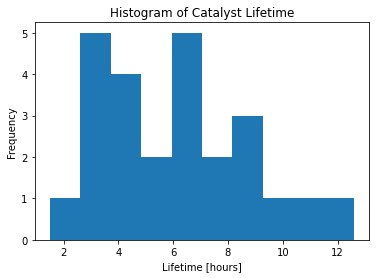

In [2]:
# Catalyst example data
lifetime = [3.2, 6.8, 4.2, 9.2, 11.2, 3.7, 2.9, 12.6, 6.4, 7.5, 8.6,
            4.5, 3.0, 9.6, 1.5, 4.5, 6.3, 7.2, 8.5, 4.2, 6.3, 3.2, 5.0, 4.9, 6.6]

# Compute the mean and standard deviation
xbar = np.mean(lifetime)
s = np.std(lifetime)

# Plot lifetime data
plt.hist(lifetime)
plt.title("Histogram of Catalyst Lifetime")
plt.xlabel("Lifetime [hours]")
plt.ylabel("Frequency")
plt.show()

**Sample Statistics**

In [3]:
print("Lifetime Average:",round(xbar,2),"hours")
print("Lifetime Standard Deviation: {:.2f} hours".format(s))

Lifetime Average: 6.06 hours
Lifetime Standard Deviation: 2.72 hours


**Key Question**

The mean **sample** lifetime is 6.06 hours, which is much better than the 5 hour goal. Here are two possible interpretations of the data:
1. The population mean (new catalyst lifetime) is actually 5.7 hours or less. The sample mean is higher because of random variations in the experiment (sampling from the population).
2. The population mean is actually 5.7 hours or greater, and the sample reflects this fact.

We will use **hypothesis testing** to discern between these two possible explanations.

Mathematically, we want to draw a conclusion about the mean catalyst lifetime, i.e., the expected value of the population distribution.

### Null and Alternative Hypotheses

**Null Hypothesis** (option 1 above, denoted $H_0$): Effect indicated by the sample is due to random variations.

**Alternative Hypothesis** (option 2 above, denoted $H_1$ or $H_a$): Effect indicated by the sample is real.

### Hypothesis Testing Procedure
1. Define $H_0$ and $H_1$.
2. Assume $H_0$ to be true.
3. Compute the test statistic.
4. Compute the P-value.
5. State conclusions.

We will follow these steps whenever doing hypothesis testing in this class. We will now walk through the **catalyst lifetime example**.

#### Step 1. Define Hypotheses.

$$H_0: \mu \leq 5.7 \qquad \mathrm{versus} \qquad H_a: \mu > 5.7$$

#### Step 2. Assume $H_0$ is True.

We do not need to write anything for this step. But it is important to remember this assumption for the remaining calculations.

#### Step 3. Compute the Test Statistic.

We do not know the population standard deviation, so we will use a t-statistic.

$$
t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}
$$

In [4]:
tscore = (xbar - 5.7)/(s / math.sqrt(len(lifetime)))
print("t = ",tscore)

t =  0.6694840523966666


#### Step 4. Calculate P-Value.

The P-value tells us the probability of observing a sample as or more extreme than the current one if the null hypothesis is true. (Remember Step 2.)


We can calculate the P-Value by integrating the area under the t-distribution (or normal distribution). **I strongly recommend drawing a picture of a z-/t-distribution and shading the area under the curve that corresponds with the P-value. This is essential to not make a sign mistake when using ``cdf()``.** The integral is intractable, so we will use Python or a look-up table.

In [5]:
# You'll want to draw a picture whenever connecting a P-value to the cdf() function in Python
pval = 1 - stats.t.cdf(tscore, len(lifetime)-1)
print("P-value:",pval)

P-value: 0.2547883922583275


#### Step 5. State Conclusions

The P-value is 0.25, which is greater than 0.05, so we **fail to reject the null hypothesis**. We cannot conclude the new catalyst has a mean lifetime greater than 5.7 hours.

**Important Ideas**:
* The smaller the P-value, the more certain we are that $H_0$ is false.
* The larger the P-value, the more plausible $H_0$.
* We can never be certain the $H_0$ is true. Thus we never conclude "accept the null hypothesis".
* We can only conclude to **reject** the null hypothesis or **fail to reject** the null hypothesis. We can never be certain the $H_0$ is true, and thus never say "accept the null hypothesis".
* Rule of thumb is to reject $H_0$ whenever $P \leq 0.05$, but this has no scientific basis.
* The P-value is NOT the probability $H_0$ is true. (To make this statement, we would need Bayesian statistics.)

**Statistical Significance**. For $P \leq \alpha$ and $0 < \alpha < 1$, people often say:
* The results of the test are statistically significant at the 100$\alpha$% level.
* The null hypothesis is rejected at 100$\alpha$% level.

### Summary of Hypotheses and P-Values

| Null Hypothesis | Alternate Hypothesis | P-Value |
|-|-|-|
| $H_0: \mu \leq \mu_0$ |  $H_a: \mu > \mu_0$ | Area to the right of $z$ (or $t$) |
| $H_0: \mu \geq \mu_0$ |  $H_a: \mu < \mu_0$ | Area to the left of $z$ (or $t$) |
| $H_0: \mu = \mu_0$ |  $H_a: \mu \neq \mu_0$ | Sum of the areas in the tails cut off by $z$ and $-z$ (or $t$ and $-t$) |

**Coda**: Confidence Intervals and Hypothesis Testing are Closely Related